<a href="https://colab.research.google.com/github/cwf2/style_2025/blob/main/Example%201b_%20female%20speakers%20in%20Il.%20and%20Od..ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install DICES client software

This step is only necessary once on most machines, but because Google Colab runs this notebook on a fresh virtual machine every time, we always need to install DICES as the first step.

In [1]:
!pip install -q git+https://github.com/cwf2/dices-client

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 697.1/697.1 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 21.5 MB/s 

### Import statements

This tells Python which ancillary functions we want to use in this notebook.

In [5]:
from dicesapi import DicesAPI
from dicesapi.text import CtsAPI
import pandas as pd
import seaborn as sns

### Initialize connection to external sources

This creates connections to the speech database and to the digital library.

In [6]:
# DICES database
api = DicesAPI(logdetail = 0)

# Perseus Digital Library
cts = CtsAPI(dices_api = api)

[GENE]Database Initialized

### Get some speeches

This is the basic search function to get speeches from DICES according to specific parameters.

In [7]:
speeches = api.getSpeeches(author_name="Homer", spkr_gender="female")
n = len(speeches)
print(f"Retrieved {n} speeches")

Retrieved 258 speeches


In [8]:
for speech in speeches:
    print(speech.id, speech.author.name, speech.work.title, speech.l_fi, speech.l_la, speech.getSpkrString(), speech.getAddrString(), sep="\t")

14	Homer	Iliad	1.207	1.214	Athena	Achilles
23	Homer	Iliad	1.362	1.363	Thetis	Achilles
25	Homer	Iliad	1.414	1.427	Thetis	Achilles
28	Homer	Iliad	1.503	1.510	Thetis	Zeus
29	Homer	Iliad	1.514	1.516	Thetis	Zeus
31	Homer	Iliad	1.540	1.543	Hera	Zeus
33	Homer	Iliad	1.552	1.559	Hera	Zeus
43	Homer	Iliad	2.157	2.165	Hera	Athena
44	Homer	Iliad	2.173	2.181	Athena	Odysseus
56	Homer	Iliad	2.796	2.806	Iris-Polites	Priam
62	Homer	Iliad	3.130	3.138	Iris-Laodice	Helena
65	Homer	Iliad	3.172	3.180	Helena	Priam
68	Homer	Iliad	3.200	3.202	Helena	Priam
71	Homer	Iliad	3.229	3.242	Helena	Priam
79	Homer	Iliad	3.390	3.394	Aphrodite-old woman	Helena
80	Homer	Iliad	3.399	3.412	Helena	Aphrodite
81	Homer	Iliad	3.414	3.417	Aphrodite	Helena
82	Homer	Iliad	3.428	3.436	Helena	Paris
86	Homer	Iliad	4.25	4.29	Hera	Zeus
88	Homer	Iliad	4.51	4.67	Hera	Zeus
91	Homer	Iliad	4.93	4.103	Athena	Pandarus
113	Homer	Iliad	5.31	5.34	Athena	Ares
117	Homer	Iliad	5.124	5.132	Athena	Diomedes
128	Homer	Iliad	5.359	5.362	Aphrodite	Ares
129	H

### Print out some basic information about the speeches

This loops over each speech in turn and prints out its attributes, separated by a tab.


### Extract book and line numbers from the loci

The loci are recorded as *strings*, that is, sequences of characters rather than as numeric data. Here we split each locus into two parts based on the "." character, and convert each part to a number (integer or `int`).

To keep the example short, we'll just look at the first 10 speeches.

In [9]:
for speech in speeches:
    loc_first = speech.l_fi
    loc_last = speech.l_la

    book_first, line_first = loc_first.split(".")
    book_last, line_last = loc_last.split(".")

    print(speech.id, speech.author.name, speech.work.title, book_first, line_first, line_last, sep="\t")

14	Homer	Iliad	1	207	214
23	Homer	Iliad	1	362	363
25	Homer	Iliad	1	414	427
28	Homer	Iliad	1	503	510
29	Homer	Iliad	1	514	516
31	Homer	Iliad	1	540	543
33	Homer	Iliad	1	552	559
43	Homer	Iliad	2	157	165
44	Homer	Iliad	2	173	181
56	Homer	Iliad	2	796	806
62	Homer	Iliad	3	130	138
65	Homer	Iliad	3	172	180
68	Homer	Iliad	3	200	202
71	Homer	Iliad	3	229	242
79	Homer	Iliad	3	390	394
80	Homer	Iliad	3	399	412
81	Homer	Iliad	3	414	417
82	Homer	Iliad	3	428	436
86	Homer	Iliad	4	25	29
88	Homer	Iliad	4	51	67
91	Homer	Iliad	4	93	103
113	Homer	Iliad	5	31	34
117	Homer	Iliad	5	124	132
128	Homer	Iliad	5	359	362
129	Homer	Iliad	5	373	374
130	Homer	Iliad	5	376	380
131	Homer	Iliad	5	382	415
132	Homer	Iliad	5	421	425
143	Homer	Iliad	5	714	718
144	Homer	Iliad	5	757	763
146	Homer	Iliad	5	787	791
147	Homer	Iliad	5	800	813
149	Homer	Iliad	5	826	834
159	Homer	Iliad	6	164	165
161	Homer	Iliad	6	254	262
163	Homer	Iliad	6	305	310
166	Homer	Iliad	6	344	358
170	Homer	Iliad	6	407	439
179	Homer	Iliad	7	34	36
207	Homer	Iliad	

### Putting it all together

In [11]:
for speech in speeches:
    # separate book and line numbers
    book_first, line_first = speech.l_fi.split(".")
    book_last, line_last = speech.l_la.split(".")

    # calculate length of speech
    nlines = int(line_last) - int(line_first) + 1

    # get first speaker gender
    spkr_gender = speech.spkr[0].gender

    # print row
    print(
        speech.id,
        speech.author.name,
        speech.work.title,
        book_first,
        line_first,
        line_last,
        nlines,
        speech.getSpkrString(),
        spkr_gender,
        speech.getAddrString(),
        sep="\t")

14	Homer	Iliad	1	207	214	8	Athena	female	Achilles
23	Homer	Iliad	1	362	363	2	Thetis	female	Achilles
25	Homer	Iliad	1	414	427	14	Thetis	female	Achilles
28	Homer	Iliad	1	503	510	8	Thetis	female	Zeus
29	Homer	Iliad	1	514	516	3	Thetis	female	Zeus
31	Homer	Iliad	1	540	543	4	Hera	female	Zeus
33	Homer	Iliad	1	552	559	8	Hera	female	Zeus
43	Homer	Iliad	2	157	165	9	Hera	female	Athena
44	Homer	Iliad	2	173	181	9	Athena	female	Odysseus
56	Homer	Iliad	2	796	806	11	Iris-Polites	male	Priam
62	Homer	Iliad	3	130	138	9	Iris-Laodice	female	Helena
65	Homer	Iliad	3	172	180	9	Helena	female	Priam
68	Homer	Iliad	3	200	202	3	Helena	female	Priam
71	Homer	Iliad	3	229	242	14	Helena	female	Priam
79	Homer	Iliad	3	390	394	5	Aphrodite-old woman	female	Helena
80	Homer	Iliad	3	399	412	14	Helena	female	Aphrodite
81	Homer	Iliad	3	414	417	4	Aphrodite	female	Helena
82	Homer	Iliad	3	428	436	9	Helena	female	Paris
86	Homer	Iliad	4	25	29	5	Hera	female	Zeus
88	Homer	Iliad	4	51	67	17	Hera	female	Zeus
91	Homer	Iliad	4	93	103	11	At

### Make a table

Python can work with tabular data like a spreadsheet with the help of the ancillary package Pandas. Here we make the same data into a Pandas DataTable.

We can select which parts of the data we have collected above we want to put in our table.

In [12]:
# an empty list to hold the rows
rows = list()

# iterate over the speeches
for speech in speeches:
    # separate book and line numbers
    book_first, line_first = speech.l_fi.split(".")
    book_last, line_last = speech.l_la.split(".")

    # calculate length of speech
    nlines = int(line_last) - int(line_first) + 1

    # get first speaker gender
    spkr_gender = speech.spkr[0].gender

    # create a new row, labelling all the data values
    row = {
        "id": speech.id,
        "author": speech.author.name,
        "work": speech.work.title,
        "book": int(book_first),
        "first_line": line_first,
        "last_line": line_last,
        "num_lines": nlines,
        "speaker": speech.getSpkrString(),
    }

    # add the row to the list
    rows.append(row)

# make the table
table = pd.DataFrame(rows)

# write the table to a file for import to Excel
table.to_csv("speeches.tsv", sep="\t", index=False)

# display the table
display(table)

,id,author,work,book,first_line,last_line,num_lines,speaker
0,14,Homer,Iliad,1,207,214,8,Athena
1,23,Homer,Iliad,1,362,363,2,Thetis
2,25,Homer,Iliad,1,414,427,14,Thetis
3,28,Homer,Iliad,1,503,510,8,Thetis
4,29,Homer,Iliad,1,514,516,3,Thetis
...,...,...,...,...,...,...,...,...
253,1343,Homer,Odyssey,24,131,137,7,Penelope
254,1362,Homer,Odyssey,24,473,476,4,Athena
255,1369,Homer,Odyssey,24,517,519,3,Athena-Mentor
256,1370,Homer,Odyssey,24,531,532,2,Athena


### Summarize data

Just like in Excel, we can summarize tabular data with a pivot table (draaitabel). In this example, we'll count how many speeches are attributed to male and female speakers in each book of the *Iliad* and the *Odyssey*.

We need to specify which columns in the original table we want to use:
- The rows (or "index") of our summary table will come from `book`. Each book gets one row in the new table.
- The columns will come from `gender`, i.e., "male" and "female".
- We'll derive the values for each cell from the `id` column: that is, we're going to count how many speeches each gender gets.

We also need to specify how we want to summarize the speech ids. In this case, we just want to count them. We tell Python this using the `aggfunc` ("aggregation function") parameter.

In [13]:
count_by_book = (
    table
    .pivot_table(
        index="book",
        columns="work",
        values="id",
        aggfunc="count"
    )
    .fillna(0)
    .astype(int)
)
count_by_book.to_csv("speech_count_by_book.csv", index=False)
display(count_by_book)

work,Iliad,Odyssey
book,,
1,7,7
2,3,4
3,8,6
4,3,15
5,12,7
6,5,6
7,1,3
8,7,4
10,1,7


### Make a graph

Pandas has some basic visualization functions built in. Let's turn the summary table above into a bar graph.

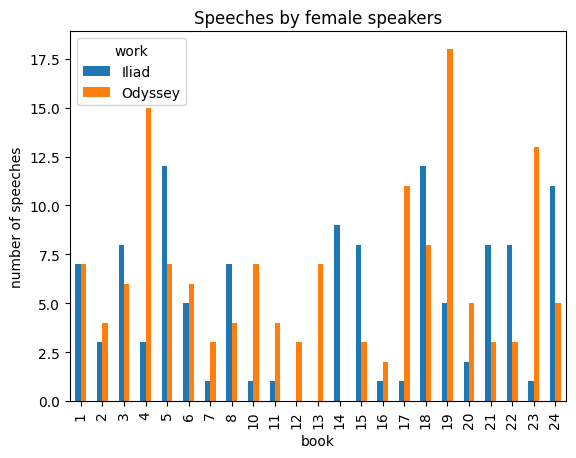

In [14]:
# generate a bar graph
plot_by_book = count_by_book.plot.bar(title="Speeches by female speakers", ylabel="number of speeches")

# save to an image file
plot_by_book.figure.savefig("speech_count_by_book.png")

### More aggregation options

Let's do a second summary, this time looking at the number of lines spoken by each gender in each book of the poem. The rows and columns of our summary table will be the same as last time. But now the values will come from `num_lines` and the aggregation function will be `"sum"` instead of `"count"`.

In [ ]:
count_by_line = (
    table
    .pivot_table(
        index="book",
        columns="work",
        values="num_lines",
        aggfunc="sum"
    )
    .fillna(0)
    .astype(int)
)
count_by_line.to_csv("lines_by_gender.csv", index=False)
display(count_by_line)

In [ ]:
# generate a bar graph
plot_by_line = count_by_line.plot.bar(title="line count of female speakers", ylabel="number of lines")

# save to an image file
plot_by_line.figure.savefig("line_count_by_gender.png")